Original Written by Federica B. Bianco @fedhere
UDel DSPS

**Work Completed by Dakota Neumann**

In [75]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

from scipy.stats import pareto

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pareto']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution) with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

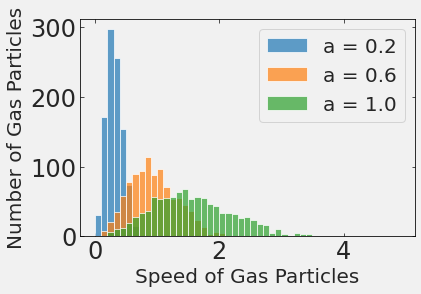

In [90]:
np.random.randn(234)
fig, ax = pl.subplots()

for a in [0.2, 0.6, 1.0]:
    np.random.seed(seed=234); ### I added this so that the mean that is calculated in step 3 is the same as the means here of the distributions here
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
    #df=3 is 3 degrees of freedom, scale=a
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend();

# your code to add labels here

plt.xlabel("Speed of Gas Particles");
plt.ylabel("Number of Gas Particles");


# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)
 

Your answer here:...
since a(T), and the relation is just T^(1/2) -->
   **$a \propto \sqrt{T}$**


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**

In [89]:
#Find Chi Distribution mean on wiki
#Our distribution uses 'a' and the num. of degrees of freedom
#The mean scales linearly with mu_MB,k,a
#use sp.special.gamma() to calculate the gamma function
#in pt-1, the degrees of freedom(df or k) used is 3

np.random.seed(seed=234)
mu_1=0.2*sqrt(2)*sp.special.gamma((3+1)/2)/sp.special.gamma(3/2) # k=3 a=0.2
np.random.seed(seed=234)
mu_2=0.6*sqrt(2)*sp.special.gamma((3+1)/2)/sp.special.gamma(3/2) # k=3 a=0.6
np.random.seed(seed=234)
mu_3=1.0*sqrt(2)*sp.special.gamma((3+1)/2)/sp.special.gamma(3/2) # k=3 a=1.0

print("from the chi-distribution mean from wikipedia:")
print('\u03BC (k=3,a=0.2)', "=",  str(round(mu_1, 4)))
print('\u03BC (k=3,a=0.6)', "=",  str(round(mu_2, 4)))
print('\u03BC (k=3,a=1.0)', "=",  str(round(mu_3, 4)),'\n')

#finding the mean of the empirical distributions from step 1:
np.random.seed(seed=234)
mean_1=mean(sp.stats.chi.rvs(df=3, scale=0.2, size=1000))
np.random.seed(seed=234)
mean_2=mean(sp.stats.chi.rvs(df=3, scale=0.6, size=1000))
np.random.seed(seed=234)
mean_3=mean(sp.stats.chi.rvs(df=3, scale=1.0, size=1000))
print("from the means from step 1:")
print("mean where a=0.2:",round(mean_1,4))
print("mean where a=0.6:",round(mean_2,4))
print("mean where a=1.0:",round(mean_3,4),"\n")
print("The difference between",'\u03BC (k=3,a=0.2)',"and Step 1's a=0.2 is:",round(abs(mean_1-mu_1),4))
print("The difference between",'\u03BC (k=3,a=0.6)',"and Step 1's a=0.6 is:",round(abs(mean_2-mu_2),4))
print("The difference between",'\u03BC (k=3,a=1.0)',"and Step 1's a=1.0 is:",round(abs(mean_3-mu_3),4))

from the chi-distribution mean from wikipedia:
μ (k=3,a=0.2) = 0.3192
μ (k=3,a=0.6) = 0.9575
μ (k=3,a=1.0) = 1.5958 

from the means from step 1:
mean where a=0.2: 0.3146
mean where a=0.6: 0.9437
mean where a=1.0: 1.5729 

The difference between μ (k=3,a=0.2) and Step 1's a=0.2 is: 0.0046
The difference between μ (k=3,a=0.6) and Step 1's a=0.6 is: 0.0138
The difference between μ (k=3,a=1.0) and Step 1's a=1.0 is: 0.0229


The similarity between the means suggests that the averages at each scaling parameter are related. These means are likely similar to the most probable molecular speed, although it is not identical.

This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.